# Fraud Prediction Using Skewed Data

### How do we achieve good predictive power in the statistical model? Can sampling techniques help? Let's find out!


## 1. Setup
To prepare your environment, you need to install some packages.

### 1.1 Install the necessary packages

You need the latest versions of these packages:<br>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Read the Data & convert it into Dataframe
Click on Insert to code and then select Insert pandas DataFrame in the below empty cell.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,10,0.385,0.616,-0.874,-0.094,2.925,3.317,0.470,0.538,-0.559,...,0.050,0.238,0.009,0.997,-0.767,-0.492,0.042,-0.054,9.99,0
1,12,-0.752,0.345,2.057,-1.469,-1.158,-0.078,-0.609,0.004,-0.436,...,0.500,1.354,-0.257,-0.065,-0.039,-0.087,-0.181,0.129,15.99,0
2,25,1.114,0.086,0.494,1.336,-0.300,-0.011,-0.119,0.189,0.206,...,-0.053,-0.005,-0.031,0.198,0.565,-0.338,0.029,0.004,4.45,0
3,33,-0.936,0.170,2.746,-1.078,-0.306,0.012,-0.296,0.403,-0.040,...,0.401,1.065,-0.158,0.296,-0.259,0.754,0.047,0.094,9.10,0
4,35,1.199,0.130,0.864,1.003,-0.784,-0.885,-0.041,-0.208,0.392,...,-0.042,0.198,-0.033,1.013,0.559,0.402,-0.006,0.018,0.99,0


## 3. Assign a new name for the dataframe

In [3]:
'''Rename the dataframe to df'''

df = df_data_2

## 4. Descriptive statistics on the data

In [4]:
print("Time")
print(df.Time.describe())
print("V1")
print(df.Time.describe())
print("Amount")
print(df.Amount.describe())
print("Class")
print(df.Class.describe())
print(df.Class.nunique())
print("ALL")
print(df.describe())

Time
count     56874.000000
mean      94995.469934
std       47535.817923
min          10.000000
25%       54380.250000
50%       84664.500000
75%      139664.500000
max      172782.000000
Name: Time, dtype: float64
V1
count     56874.000000
mean      94995.469934
std       47535.817923
min          10.000000
25%       54380.250000
50%       84664.500000
75%      139664.500000
max      172782.000000
Name: Time, dtype: float64
Amount
count    56874.000000
mean        88.264681
std        233.922284
min          0.000000
25%          5.740000
50%         22.205000
75%         78.600000
max       7862.390000
Name: Amount, dtype: float64
Class
count    56874.000000
mean         0.001793
std          0.042311
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64
2
ALL
                Time            V1            V2            V3            V4  \
count   56874.000000  56874.000000  56874.000000  56874.000000

## 5. Use Histogram to visualize

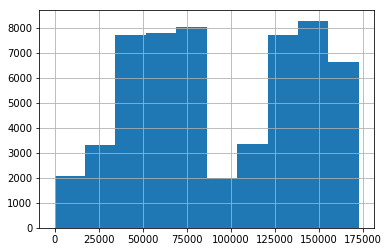

In [5]:
df.Time.hist()

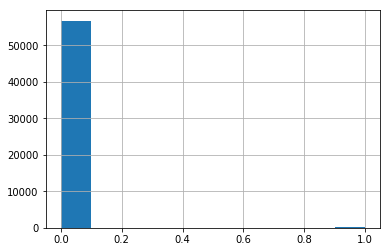

In [6]:
df.Class.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x2accb4be1320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x2accb4c1c048>], dtype=object)

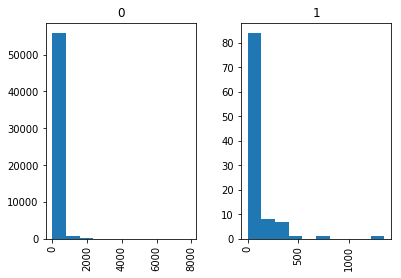

In [7]:
df['Amount'].hist(by=df['Class'])

In [8]:
print(df.groupby('Class').size())

Class
0    56772
1      102
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2accb4bf2860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2accbb8d5cf8>]], dtype=object)

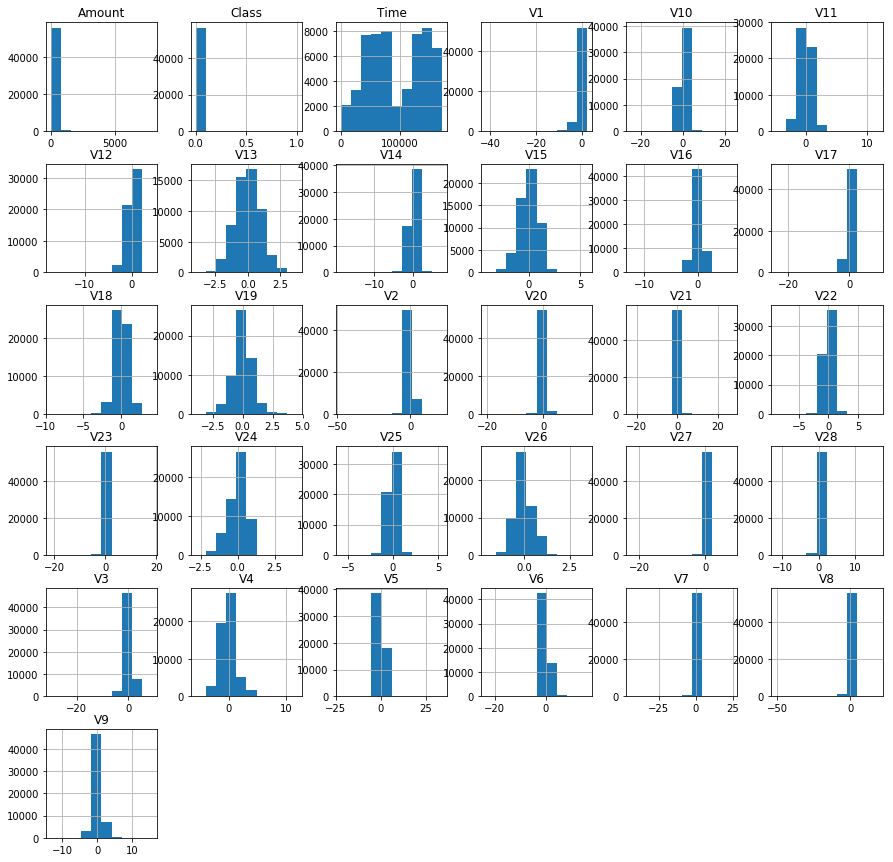

In [9]:
df.hist(figsize=(15,15))

## 6. Check the spread of fraud vs non-fraud on selected variables
#### This is done to identify variables selection which has good spread of frauds and non frauds

V9 - V10


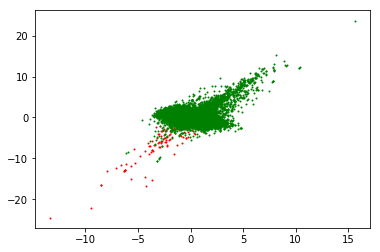

In [10]:
sample = df[df['Class']==0]
fraud = df[df['Class']==1]
print('V9 - V10')
plt.scatter(fraud['V9'], fraud['V10'],s=1, color='r')
plt.scatter(sample['V9'], sample['V10'], s=1, color='g')
plt.show()
plt.clf()

V16-V17


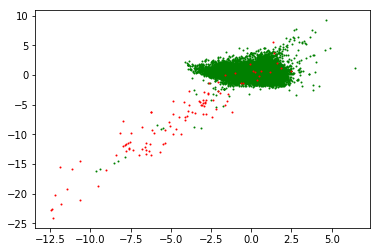

In [11]:
print('V16-V17')
plt.scatter(sample['V16'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V16'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()

V17 - V18


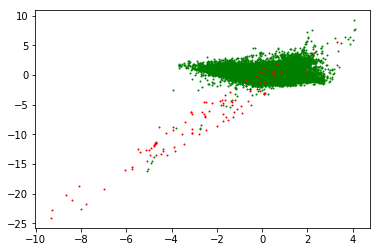

In [12]:
print('V17 - V18')
plt.scatter(sample['V18'], sample['V17'], s=1, color = 'g')
plt.scatter(fraud['V18'], fraud['V17'], s=1, color = 'r')
plt.show()
plt.clf()

V1 - V3


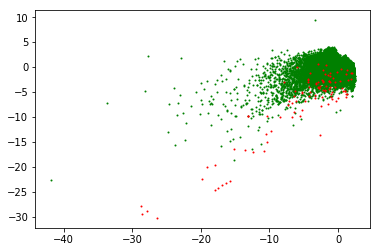

In [13]:
print('V1 - V3')
plt.scatter(sample['V1'], sample['V3'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V3'], s=1, color = 'r')
plt.show()
plt.clf()

V1 - V2


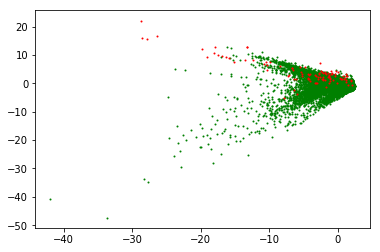

In [14]:
print('V1 - V2')
plt.scatter(sample['V1'], sample['V2'], s=1, color = 'g')
plt.scatter(fraud['V1'], fraud['V2'], s=1, color = 'r')
plt.show()
plt.clf()

## 7. Split the data into train & test data sets using 70:30 mix
#### The model will be built on training data and will be applied on the test data

In [15]:
# Split The Data with all variables

from sklearn.model_selection import train_test_split

x = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(39811, 30)
xtest shape
(17063, 30)


## 8. Use Random Forest Algorithm
#### A brief about Random Forest Algorithm
Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.  Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests will avoid overfitting which will enhance the accuracy of the model on new data. This is a Bagging based algorithm which is used for reducing Overfitting in order to create strong learners for generating accurate predictions.

In [16]:
# RF Classifier explained

'''rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=4)
n_estimators : integer, optional (default=10)
The number of trees in the forest.
oob_score : bool (default=False)
Whether to use out-of-bag samples to estimate the generalization accuracy.
n_jobs : integer, optional (default=1)
The number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores.
'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
confusion matrix
[[17029     1]
 [    9    24]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17030
          1       0.96      0.73      0.83        33

avg / total       1.00      1.00      1.00     17063

Accuracy : 0.999414
Area under the curve : 0.863607


#### In the above classification report we are getting the f1-score of 89 which is the harmonic mean of precision & recall scores.
##### Recall is where the model tries to recollect the number of instances, in this case the model has been able to recollect 82% of frauds and able to classify them as frauds 96 % of the recollected events which is the precision of the model. 
##### Area under the curve signifies the accuracy of the model (values between 0 & 1) where the score towards 1 indicate high predictive power.
# <font color='Red'> Note  : The numbers for recall, precision, F1 Score & Area under the curve can change for different runs of the model due to stocastic nature of the algorithms.

# 9. Use Gradient Boosting Alogrithm
#### A Brief about Gradient Boosting Algorithm
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function(a loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event). This is a Boosting based algorithm which is an ensemble technique to combine weak learners to create a strong learner that can make accurate predictions. 

In [17]:
# GBM Classifier explained

'''params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5, 'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble. GradientBoostingClassifier(**params)
n_estimators : int (default=100)
The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting, so a large number usually results in better performance.
max_depth: integer, optional (default=3)
maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. The best value depends on the interaction of the input variables.
subsample: float, optional (default=1.0)
The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.
random_state : int, RandomState instance or None, optional (default=None)
If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
learning_rate : float, optional (default=0.1)
learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators.
min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:
'''

from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17022     8]
 [   10    23]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17030
          1       0.74      0.70      0.72        33

avg / total       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.998945085858
Area under the curve : 0.848250


# 10. Use Extreme Gradient Boosting Alogrithm
#### A Brief about Extreme Gradient Boosting Algorithm
XGBoost is one of the implementations of Gradient Boosting concept, but what makes XGBoost unique is that it uses “a more regularized model formalization to control over-fitting, which gives it better performance,” according to the author of the algorithm, Tianqi Chen. Therefore, it helps to reduce overfitting.

In [18]:
from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
# List the default parameters.
print(xgb_model.get_xgb_params())

{'reg_alpha': 0, 'reg_lambda': 1, 'max_depth': 3, 'scale_pos_weight': 1, 'n_estimators': 100, 'max_delta_step': 0, 'min_child_weight': 1, 'seed': 0, 'colsample_bylevel': 1, 'colsample_bytree': 1, 'silent': 1, 'subsample': 1, 'learning_rate': 0.1, 'objective': 'binary:logistic', 'base_score': 0.5, 'gamma': 0, 'missing': None}


In [20]:
# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_metric=['error'], eval_set=[((xtrain, ytrain)),(xtest, ytest)])

[0]	validation_0-error:0.000502	validation_1-error:0.000762
[1]	validation_0-error:0.000527	validation_1-error:0.000762
[2]	validation_0-error:0.000427	validation_1-error:0.000762
[3]	validation_0-error:0.000527	validation_1-error:0.000762
[4]	validation_0-error:0.000502	validation_1-error:0.000645
[5]	validation_0-error:0.000427	validation_1-error:0.00082
[6]	validation_0-error:0.000427	validation_1-error:0.000762
[7]	validation_0-error:0.000402	validation_1-error:0.000762
[8]	validation_0-error:0.000352	validation_1-error:0.000703
[9]	validation_0-error:0.000352	validation_1-error:0.000762
[10]	validation_0-error:0.000352	validation_1-error:0.000703
[11]	validation_0-error:0.000327	validation_1-error:0.000527
[12]	validation_0-error:0.000327	validation_1-error:0.000527
[13]	validation_0-error:0.000301	validation_1-error:0.000586
[14]	validation_0-error:0.000301	validation_1-error:0.000527
[15]	validation_0-error:0.000301	validation_1-error:0.000586
[16]	validation_0-error:0.000301	va

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [21]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17028     2]
 [    7    26]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17030
          1       0.93      0.79      0.85        33

avg / total       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.999472542929
Area under the curve : 0.893881


#### As we can see, the F1 score and Area under the curve are higher compared to previous model. 

# 11. Select random variables for model building
#### This is done to check whether we can get a lift on the accuracy with fewer variables

In [22]:
# Split The Data with few variables

from sklearn.model_selection import train_test_split

x = df[['V9', 'V10','V16', 'V17', 'V18', 'Amount']]
y = df['Class']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(39811, 6)
xtest shape
(17063, 6)


In [23]:
'''Random Forest Classifier on reduced dimensions data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
confusion matrix
[[17028     2]
 [    8    25]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17030
          1       0.93      0.76      0.83        33

avg / total       1.00      1.00      1.00     17063

Accuracy : 0.999414
Area under the curve : 0.878729


#### The F1 score has reduced with fewer variables along with Area under the curve

In [24]:
'''Gradient Boost Algorithm on reduced dimensions data'''

from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17023     7]
 [    8    25]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17030
          1       0.78      0.76      0.77        33

avg / total       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.999120904882
Area under the curve : 0.878582


#### Reduction in the F1 score with fewer variables.

In [25]:
'''Extreme Gradient Boost Algorithm on reduced dimensions data'''

from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()
# List the default parameters.
print(xgb_model.get_xgb_params())

{'reg_alpha': 0, 'reg_lambda': 1, 'max_depth': 3, 'scale_pos_weight': 1, 'n_estimators': 100, 'max_delta_step': 0, 'min_child_weight': 1, 'seed': 0, 'colsample_bylevel': 1, 'colsample_bytree': 1, 'silent': 1, 'subsample': 1, 'learning_rate': 0.1, 'objective': 'binary:logistic', 'base_score': 0.5, 'gamma': 0, 'missing': None}


In [26]:
# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_metric=['error'], eval_set=[((xtrain, ytrain)),(xtest, ytest)])

[0]	validation_0-error:0.000527	validation_1-error:0.000645
[1]	validation_0-error:0.000553	validation_1-error:0.000586
[2]	validation_0-error:0.000553	validation_1-error:0.000586
[3]	validation_0-error:0.000553	validation_1-error:0.000586
[4]	validation_0-error:0.000553	validation_1-error:0.000586
[5]	validation_0-error:0.000553	validation_1-error:0.000586
[6]	validation_0-error:0.000553	validation_1-error:0.000586
[7]	validation_0-error:0.000553	validation_1-error:0.000586
[8]	validation_0-error:0.000553	validation_1-error:0.000586
[9]	validation_0-error:0.000553	validation_1-error:0.000586
[10]	validation_0-error:0.000553	validation_1-error:0.000586
[11]	validation_0-error:0.000527	validation_1-error:0.000586
[12]	validation_0-error:0.000527	validation_1-error:0.000645
[13]	validation_0-error:0.000527	validation_1-error:0.000586
[14]	validation_0-error:0.000527	validation_1-error:0.000645
[15]	validation_0-error:0.000527	validation_1-error:0.000645
[16]	validation_0-error:0.000527	v

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [27]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17027     3]
 [    7    26]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17030
          1       0.90      0.79      0.84        33

avg / total       1.00      1.00      1.00     17063

-----------------------------------------------------------------------------------------
Accuracy is :
0.999413936588
Area under the curve : 0.893851


#### Higher F1 score compared to Gradient Boosting Model

# 11. Random Under Sampling
#### This is done to reduce the imbalance between frauds & non frauds

In [28]:
'''We are taking 10% of non frauds and merge it with frauds data'''

df = df[['Class', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]


sample = df[df['Class']==0]
fraud = df[df['Class'] == 1]

# random sampling
ignore_me, sample = train_test_split(sample, test_size = 0.1)

In [29]:
import warnings
warnings.filterwarnings("ignore")

sample = pd.concat([sample, fraud])

# Split into train and test units.
xtrain, xtest = train_test_split(sample, test_size = 0.3)
ytrain = xtrain['Class']
ytest = xtest['Class']
xtrain.drop('Class', 1, inplace = True)
xtest.drop('Class', 1, inplace = True)

In [30]:
'''Random Forest Classifier on undersampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
confusion matrix
[[1703    0]
 [   2   29]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1703
          1       1.00      0.94      0.97        31

avg / total       1.00      1.00      1.00      1734

Accuracy : 0.998847
Area under the curve : 0.967742


#### we can see an increase in F1 score which indicates that random under sample can give a lift in the accuracy. However we need to do random sampling multiple times for training the model and then use it on the new data for better results.

In [31]:
'''Gradient Boost Algorithm on undersampled data'''

from sklearn import ensemble

params = {'n_estimators': 650, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[1700    3]
 [   3   28]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1703
          1       0.90      0.90      0.90        31

avg / total       1.00      1.00      1.00      1734

-----------------------------------------------------------------------------------------
Accuracy is :
0.996539792388
Area under the curve : 0.950732


#### There is an increase in the F1 score for this sampling technique with 10% data of non-frauds and 100% frauds. 

In [32]:
'''Extreme Gradient Boost Algorithm on reduced dimensions data'''

from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

# List the default parameters.
print(xgb_model.get_xgb_params())

{'reg_alpha': 0, 'reg_lambda': 1, 'max_depth': 3, 'scale_pos_weight': 1, 'n_estimators': 100, 'max_delta_step': 0, 'min_child_weight': 1, 'seed': 0, 'colsample_bylevel': 1, 'colsample_bytree': 1, 'silent': 1, 'subsample': 1, 'learning_rate': 0.1, 'objective': 'binary:logistic', 'base_score': 0.5, 'gamma': 0, 'missing': None}


In [33]:
# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_metric=['error'], eval_set=[((xtrain, ytrain)),(xtest, ytest)])

[0]	validation_0-error:0.002472	validation_1-error:0.002307
[1]	validation_0-error:0.002472	validation_1-error:0.002307
[2]	validation_0-error:0.002472	validation_1-error:0.002307
[3]	validation_0-error:0.002472	validation_1-error:0.002307
[4]	validation_0-error:0.002472	validation_1-error:0.002307
[5]	validation_0-error:0.002472	validation_1-error:0.002307
[6]	validation_0-error:0.002472	validation_1-error:0.002307
[7]	validation_0-error:0.002472	validation_1-error:0.002307
[8]	validation_0-error:0.002472	validation_1-error:0.002307
[9]	validation_0-error:0.002472	validation_1-error:0.002307
[10]	validation_0-error:0.002472	validation_1-error:0.002307
[11]	validation_0-error:0.002472	validation_1-error:0.002307
[12]	validation_0-error:0.002472	validation_1-error:0.002307
[13]	validation_0-error:0.002472	validation_1-error:0.002307
[14]	validation_0-error:0.002472	validation_1-error:0.002307
[15]	validation_0-error:0.002472	validation_1-error:0.002307
[16]	validation_0-error:0.002472	v

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [34]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[1703    0]
 [   3   28]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1703
          1       1.00      0.90      0.95        31

avg / total       1.00      1.00      1.00      1734

-----------------------------------------------------------------------------------------
Accuracy is :
0.998269896194
Area under the curve : 0.951613


#### Higher F1 score comapred to Gradient Boosting Model.

# 12. SMOTE ( Synthetic Minority Over-sampling Technique)

In [35]:
!pip install imblearn

    100% |████████████████████████████████| 153kB 5.9MB/s eta 0:00:01
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from imbalanced-learn->imblearn)
Requirement not upgraded as not directly required: scikit-learn in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from imbalanced-learn->imblearn)
Requirement not upgraded as not directly required: scipy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from imbalanced-learn->imblearn)


In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

x = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class']

'''Increase the fraud samples from 102 to 500'''

sm = SMOTE(random_state=42,ratio={1:500})
X_res, y_res = sm.fit_sample(x, y)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 56772, 1: 500})


In [37]:
'''Split the resampled data into train & test data with 70:30 mix'''

xtrain, xtest, ytrain, ytest = train_test_split(X_res, y_res, test_size=0.30, random_state=0)
print('xtrain shape')
print(xtrain.shape)
print('xtest shape')
print(xtest.shape)

xtrain shape
(40090, 30)
xtest shape
(17182, 30)


In [38]:
'''Random Forest Classifier on resampled data'''

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(xtrain,ytrain)
print('model')
print(rfmodel)

ypredrf = rfmodel.predict(xtest)
print('confusion matrix')
print(metrics.confusion_matrix(ytest, ypredrf))
print('classification report')
print(metrics.classification_report(ytest, ypredrf))
print('Accuracy : %f' % (metrics.accuracy_score(ytest, ypredrf)))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, ypredrf)))

model
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
confusion matrix
[[17019     4]
 [   14   145]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17023
          1       0.97      0.91      0.94       159

avg / total       1.00      1.00      1.00     17182

Accuracy : 0.998952
Area under the curve : 0.955857


#### We can see an increase in F1 score and the Area under the curve. This is the advantage of synthetic over sampling technique which has given a good lift in accuracy.

In [39]:
'''Gradient Boost Algorithm on resampled data'''

from sklearn import ensemble

params = {'n_estimators': 500, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(xtrain, ytrain) #trains
y_pred = clf.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17011    12]
 [   16   143]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17023
          1       0.92      0.90      0.91       159

avg / total       1.00      1.00      1.00     17182

-----------------------------------------------------------------------------------------
Accuracy is :
0.998370387615
Area under the curve : 0.949333


#### There's an increase in precision, F1 score & Area under the curve using SMOTE and resampling the data.

In [40]:
'''Extreme Gradient Boost Algorithm on reduced dimensions data'''

from xgboost.sklearn import XGBClassifier

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier()

# List the default parameters.
print(xgb_model.get_xgb_params())

{'reg_alpha': 0, 'reg_lambda': 1, 'max_depth': 3, 'scale_pos_weight': 1, 'n_estimators': 100, 'max_delta_step': 0, 'min_child_weight': 1, 'seed': 0, 'colsample_bylevel': 1, 'colsample_bytree': 1, 'silent': 1, 'subsample': 1, 'learning_rate': 0.1, 'objective': 'binary:logistic', 'base_score': 0.5, 'gamma': 0, 'missing': None}


In [41]:
# Train and evaluate.
xgb_model.fit(xtrain, ytrain, eval_metric=['error'], eval_set=[((xtrain, ytrain)),(xtest, ytest)])

[0]	validation_0-error:0.001197	validation_1-error:0.001397
[1]	validation_0-error:0.001147	validation_1-error:0.001455
[2]	validation_0-error:0.001147	validation_1-error:0.001455
[3]	validation_0-error:0.001122	validation_1-error:0.001455
[4]	validation_0-error:0.001147	validation_1-error:0.001455
[5]	validation_0-error:0.001172	validation_1-error:0.001455
[6]	validation_0-error:0.001172	validation_1-error:0.001455
[7]	validation_0-error:0.001172	validation_1-error:0.001455
[8]	validation_0-error:0.001172	validation_1-error:0.001455
[9]	validation_0-error:0.001172	validation_1-error:0.001513
[10]	validation_0-error:0.001172	validation_1-error:0.001455
[11]	validation_0-error:0.001197	validation_1-error:0.001513
[12]	validation_0-error:0.001197	validation_1-error:0.001455
[13]	validation_0-error:0.001172	validation_1-error:0.001455
[14]	validation_0-error:0.001122	validation_1-error:0.001455
[15]	validation_0-error:0.001048	validation_1-error:0.001455
[16]	validation_0-error:0.001048	v

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [42]:
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

y_pred = xgb_model.predict(xtest)  #predicts
print('confusion matrix')
print(metrics.confusion_matrix(ytest, y_pred))
print('classification report')
print(metrics.classification_report(ytest, y_pred))
print("-----------------------------------------------------------------------------------------")
print("Accuracy is :")
print(metrics.accuracy_score(ytest, y_pred))
print('Area under the curve : %f' % (metrics.roc_auc_score(ytest, y_pred)))

confusion matrix
[[17019     4]
 [   11   148]]
classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     17023
          1       0.97      0.93      0.95       159

avg / total       1.00      1.00      1.00     17182

-----------------------------------------------------------------------------------------
Accuracy is :
0.999126993365
Area under the curve : 0.965291


#### XGBoost has given high F1 score when compared with Gradient Boosting Model

### We can conclude stating that sampling techniques are important and can be helpful if the data is skewed. We have seen two statistical algorithms (Bagging & Boosting) and their implementation on different samples of data providing different outcomes. 